In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

In [4]:
MetaHit_Hierarchical = pd.read_csv('~/Desktop/control_group/MetaHit/MetaHit_Hierarchical.csv')
MetaHit_Hierarchical = MetaHit_Hierarchical.loc[4:,:].set_index('Unnamed: 0')
MetaHit_metaphlan4 = pd.read_csv('~/Desktop/control_group/MetaHit/MetaHit.csv').set_index("Abundance").T
MetaHit_metaphlan4 = MetaHit_metaphlan4.loc[:,MetaHit_metaphlan4.columns.str.startswith('s__')].T
MetaHit_METADATA = pd.read_csv('~/Desktop/control_group/MetaHit/Study.design.txt', delimiter = "\t").set_index("Sample")
MetaHit_METADATA = MetaHit_METADATA[MetaHit_METADATA['IBD'] == 'N']
MetaHit_metaphlan4 = MetaHit_metaphlan4.loc[:,MetaHit_METADATA.index]
MetaHit_Hierarchical = MetaHit_metaphlan4.join(MetaHit_Hierarchical)
MetaHit_Hierarchical

,SAMEA728920,SAMEA728635,SAMEA728854,SAMEA728867,SAMEA728745,SAMEA728680,SAMEA728938,SAMEA728663,SAMEA728690,SAMEA728638,...,SAMEA728780,SAMEA728794,SAMEA728578,SAMEA728856,SAMEA728661,SAMEA728723,SAMEA728894,SAMEA728772,SAMEA728899,0
Abundance,,,,,,,,,,,,,,,,,,,,,
s__Phocaeicola_plebeius,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,7.84554,5.43761,0.00000,1.80892,2.89213,0.00000,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...
s__Ruminococcus_bicirculans,0.19426,0.00000,0.00000,0.00000,0.02612,0.17761,0.12917,0.31687,0.13045,0.00000,...,1.82141,0.05403,1.12798,0.00000,0.46378,2.11129,0.00000,0.48896,0.08498,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
s__Eubacterium_rectale,0.41184,14.78986,0.10193,2.82495,1.59172,0.00709,2.27436,6.55611,0.20342,8.34721,...,0.73228,0.45624,1.44026,5.43321,0.39648,0.58292,3.05827,1.27280,0.08124,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
s__Bacteroides_uniformis,0.05556,8.62134,6.09287,1.08415,0.10124,0.11435,2.84995,2.98356,0.16729,11.36583,...,3.86232,1.61244,3.93703,7.22744,3.18182,3.26883,0.63434,4.53111,0.85308,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...
s__Roseburia_faecis,5.30547,2.80559,0.30419,1.82886,1.96231,0.07721,4.11934,9.82912,0.10694,0.00000,...,0.77084,0.03673,0.01212,0.00000,0.35019,0.45761,0.00000,1.93076,0.08442,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s__Kosakonia_cowanii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,k__Bacteria|p__Proteobacteria|c__Gammaproteoba...
s__Klebsiella_oxytoca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,k__Bacteria|p__Proteobacteria|c__Gammaproteoba...
s__GGB14014_SGB21441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...


In [5]:
IBDMDB_Hierarchical = pd.read_csv('~/Desktop/Metaphlan4_set_species_control.csv')
IBDMDB_Hierarchical = IBDMDB_Hierarchical.loc[4:,:].set_index('Unnamed: 0')
IBDMDB_metaphlan4 = pd.read_csv('~/Desktop/Metaphlan4_MGX_Control.csv').set_index('Abundance').T
IBDMDB_metaphlan4 = IBDMDB_metaphlan4.loc[:,IBDMDB_metaphlan4.columns.str.startswith('s__')].T
IBDMDB_Hierarchical = IBDMDB_metaphlan4.join(IBDMDB_Hierarchical)
IBDMDB_Hierarchical

,HSM7J4HC,HSM7J4LD,MSM79H83,MSM6J2PO,CSMA8M9R,MSM9VZMU,MSM79H6D,PSMA265D,MSM6J2HR,MSM9VZGY,...,HSM67VG8,HSM67VEO,HSM67VI3,HSM7J4R2,MSMA26BL,MSM79H9A,HSM7J4KK,MSM79HC4,HSM7J4G1,0
Abundance,,,,,,,,,,,,,,,,,,,,,
s__Phocaeicola_vulgatus,23.17456,25.69161,0.00157,15.87511,11.51861,5.81560,5.65375,0.00000,25.58722,0.00000,...,8.03243,0.00000,29.88947,0.00000,7.85503,1.31148,14.84775,7.12941,0.09671,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...
s__Phocaeicola_massiliensis,20.69844,0.00000,0.00000,0.00000,5.23714,3.82368,4.33952,0.00000,0.00000,2.85065,...,0.00000,0.00000,0.00000,31.95659,3.00841,0.00000,6.85684,0.00000,0.00000,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...
s__Prevotella_copri_clade_A,16.81446,0.00692,0.00000,0.00000,0.00000,0.00000,11.96415,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.01704,0.00000,0.09925,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...
s__Alistipes_putredinis,5.02926,0.00000,3.84064,0.54406,2.61263,5.37161,1.80868,0.00000,5.14192,2.33574,...,2.92598,3.81422,7.78165,0.00000,2.76951,2.89840,3.55767,0.36777,1.07894,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...
s__Faecalibacterium_prausnitzii,3.82975,0.00000,6.22134,18.64314,2.55939,6.27643,2.34273,40.53848,3.46521,9.78696,...,1.72562,4.86957,3.48448,12.80999,14.87397,0.19539,2.96621,18.03702,2.26761,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s__Schaalia_turicensis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03889,k__Bacteria|p__Actinobacteria|c__Actinobacteri...
s__Bacteroidales_bacterium_KA00251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02447,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...
s__Parvimonas_sp_KA00067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01544,k__Bacteria|p__Firmicutes|c__Tissierellia|o__T...


In [14]:
def species_factor (df, project_name):
    df['Hierarchical'] = df['0'].apply(lambda x: x.split("|")[5] if isinstance(x, str) else [])
    df['counts'] = df['Hierarchical'].map(df['Hierarchical'].value_counts())
    df.insert((len(df.columns)-3),'counts',df.pop('counts'))
    df = df.iloc[:,0:-2].apply(lambda row: row * row['counts'], axis=1)
    # df = df.drop(['counts'],axis = 1).T
    df['Type'] = project_name
    return df

In [15]:
MetaHit = species_factor(MetaHit_Hierarchical, 'MetaHit')
MetaHit

,SAMEA728920,SAMEA728635,SAMEA728854,SAMEA728867,SAMEA728745,SAMEA728680,SAMEA728938,SAMEA728663,SAMEA728690,SAMEA728638,...,SAMEA728794,SAMEA728578,SAMEA728856,SAMEA728661,SAMEA728723,SAMEA728894,SAMEA728772,SAMEA728899,counts,Type
Abundance,,,,,,,,,,,,,,,,,,,,,
s__Phocaeicola_plebeius,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,94.14648,65.25132,0.00000,21.70704,34.70556,0.00000,144.0,MetaHit
s__Ruminococcus_bicirculans,1.74834,0.00000,0.00000,0.00000,0.23508,1.59849,1.16253,2.85183,1.17405,0.00000,...,0.48627,10.15182,0.00000,4.17402,19.00161,0.00000,4.40064,0.76482,81.0,MetaHit
s__Eubacterium_rectale,8.23680,295.79720,2.03860,56.49900,31.83440,0.14180,45.48720,131.12220,4.06840,166.94420,...,9.12480,28.80520,108.66420,7.92960,11.65840,61.16540,25.45600,1.62480,400.0,MetaHit
s__Bacteroides_uniformis,2.66688,413.82432,292.45776,52.03920,4.85952,5.48880,136.79760,143.21088,8.02992,545.55984,...,77.39712,188.97744,346.91712,152.72736,156.90384,30.44832,217.49328,40.94784,2304.0,MetaHit
s__Roseburia_faecis,63.66564,33.66708,3.65028,21.94632,23.54772,0.92652,49.43208,117.94944,1.28328,0.00000,...,0.44076,0.14544,0.00000,4.20228,5.49132,0.00000,23.16912,1.01304,144.0,MetaHit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s__Kosakonia_cowanii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,MetaHit
s__Klebsiella_oxytoca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,MetaHit
s__GGB14014_SGB21441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,MetaHit


In [8]:
IBDMDB = species_factor(IBDMDB_Hierarchical, 'IBDMDB')

In [9]:
MI_species = pd.concat([IBDMDB,MetaHit])
MI_species.insert((len(MI_species.columns)-1),'Type',MI_species.pop('Type'))
MI_species = MI_species.fillna(0)

/var/folders/qz/fy7nnm954f76spkqc86w7g_c0000gn/T/ipykernel_51937/595237669.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  MI_species.insert((len(MI_species.columns)-1),'Type',MI_species.pop('Type'))


In [10]:
Feature = MI_species.iloc[:,:-1]
Target = MI_species.loc[:,MI_species.columns == 'Type']

In [408]:
pca = PCA(n_components=3).fit(Feature)
X_pca = pca.transform(Feature)
n_pcs = pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = list(Feature.columns)
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
print(most_important_names)
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(sorted(dic.items()))
df

['s__Prevotella_copri_clade_A', 's__Bacteroides_stercoris', 's__Bacteroides_uniformis']


,0,1
0,PC1,s__Prevotella_copri_clade_A
1,PC2,s__Bacteroides_stercoris
2,PC3,s__Bacteroides_uniformis


array([0.45896128, 0.17370321, 0.07259152])

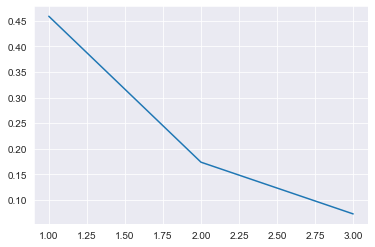

In [409]:
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,4))
pca.explained_variance_ratio_

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

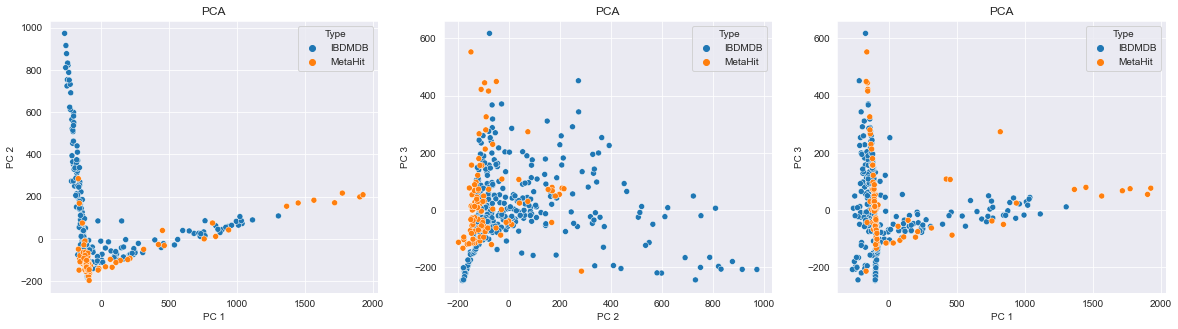

In [410]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA")
sns.scatterplot(X_pca[:,0],X_pca[:,1], hue= Target['Type'], style='Diagnosis')
plt.subplot(1,3,2)
plt.xlabel("PC 2")
plt.ylabel("PC 3")
plt.title("PCA")
sns.scatterplot(X_pca[:,1],X_pca[:,2], hue= Target['Type'], style='Diagnosis')
plt.subplot(1,3,3)
plt.xlabel("PC 1")
plt.ylabel("PC 3")
plt.title("PCA")
sns.scatterplot(X_pca[:,0],X_pca[:,2], hue= Target['Type'], style='Diagnosis')
plt.show()

/Users/odedsabah/PycharmProjects/MGX_MTX_Analysis/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


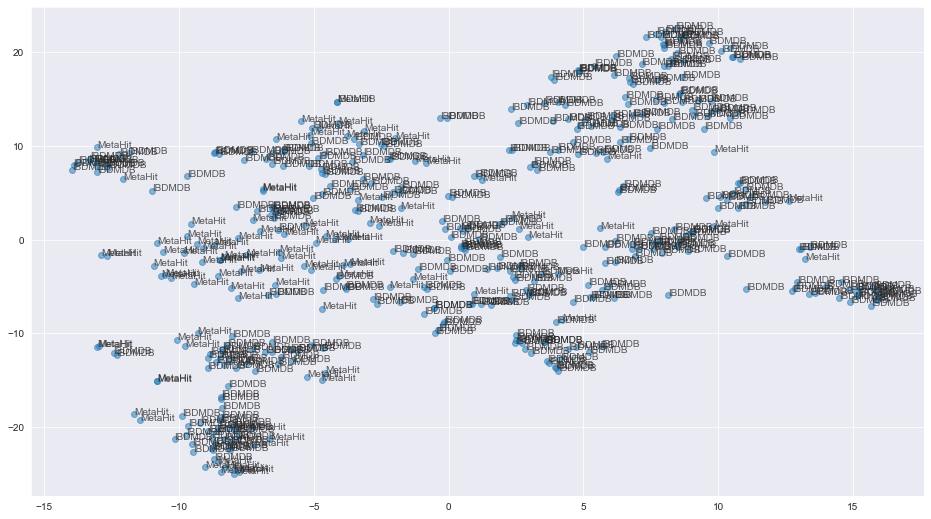

In [11]:
model = TSNE(learning_rate=1, random_state=1)

# Apply fit_transform to normalized_movements: tsne_features
Cluster_Species_Pheno = [Feature]
for pheno in Cluster_Species_Pheno:
    tsne_features = model.fit_transform(pheno)

    # Select the 0th feature: xs
    xs = tsne_features[:, 0]

    # Select the 1st feature: ys
    ys = tsne_features[:, 1]

    # Scatter plot
    plt.figure(figsize=(16, 9))
    plt.scatter(xs, ys, alpha=0.5)

    # Annotate the points
    for x, y, company in zip(xs, ys, Target['Type']):
        plt.annotate(company, (x, y), fontsize=10, alpha=0.75)